In [1]:
import os, sys
import gc
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sys.path.append('../')
import torch

In [3]:
from get_algos import get_all_algos , run_experiment ,call_paths, plot_mean

In [4]:
import gym
from gym.wrappers import Monitor
from stable_baselines3 import PPO, A2C, DDPG, DQN, SAC, TD3
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_atari_env

### 1. Explore breakout environment
<ul>
    <li>Explore the environment</li>
</ul>

In [5]:
env_name='Breakout-v0'
env=make_atari_env(env_name)
env=VecFrameStack(env,n_stack=6)

### 2. Evaluation
<ol>
    <li>Create the environment</li>
    <li>For each algorithm:</li>
    <ol><li>Load the model</li>
        <li>Evaluate the model for 5 sample iterations </li>
        <li>Output the score  for each algo and each iteration</li>
        <li>Assess stability of the model based on the variance / standard deviation </li>
    </ol>
    <li>Plot the corresponding scores</li>
</ol> 

In [8]:
algo_list=get_all_algos(gym.make(env_name))
print(algo_list)

['PPO', 'A2C', 'DQN']


In [9]:
def evaluate_experiment(algo_list, env_name,n_steps=200000,n_episodes=100):
    rewards_mean={}
    rewards_std={}
    for algo_name in reversed(algo_list):
        env=make_atari_env(env_name)
        env=VecFrameStack(env, n_stack=6)
        print('******* Evaluating', algo_name,' *******')
        device='cpu' if algo_name=='DQN' else 'cuda'
        log_path, render_path, model_path=call_paths(algo_name,env_name,n_steps)
        model_name=env_name+"_"+algo_name+"_model"
        model=eval(algo_name).load(os.path.join(model_path,model_name),env,device=device)
        mean_rew, mean_std=evaluate_policy(model,env, n_eval_episodes=n_episodes)
        rewards_mean[algo_name]=mean_rew
        rewards_std[algo_name]=mean_std
        print('Mean rewards for ',n_episodes, ' episodes of ',algo_name,' is ',mean_rew,'\n')
        del model
        env.close()
    return rewards_mean,rewards_std

In [11]:
rewards=evaluate_experiment(algo_list, env_name)

******* Evaluating DQN  *******
Wrapping the env in a VecTransposeImage.


E:\Anaconda\envs\ai_gym\lib\site-packages\stable_baselines3\common\buffers.py:229: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 84.69GB > 11.52GB
  "This system does not have apparently enough memory to store the complete "


Mean rewards for  100  episodes of  DQN  is  9.13 

******* Evaluating A2C  *******
Wrapping the env in a VecTransposeImage.
Mean rewards for  100  episodes of  A2C  is  8.62 

******* Evaluating PPO  *******
Wrapping the env in a VecTransposeImage.
Mean rewards for  100  episodes of  PPO  is  7.93 



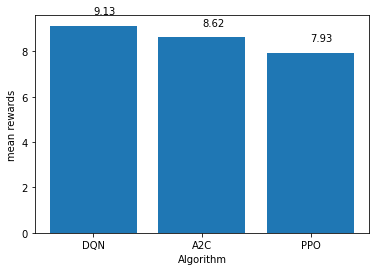

In [12]:
plot_mean(rewards[0],'mean rewards')

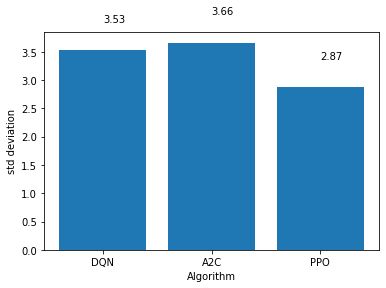

In [13]:
plot_mean(rewards[1],'std deviation')

Hence, we see that while DQN has the highest average reward, it also has the second highest standard deviation:
<ol><li> 6% higher reward than A2C but 0.96 the std deviation </li>
    <li>15% higher reward than PPO but 122% the std deviation </li>
    <li> Similarly, A2C has 9% higher reward than PPO but 1.3X its std deviation </li>